 <H2> This Will Make You Start Into The Field of Data Science -  Kaggle Survey 2018

In [171]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

<H3> This Notebook is divided into following processes:</H3>

1. Business/Project Understanding 
2. Data Understanding
3. Data Preparation
4. Data Analysis and Visualization
5. Conclusion

<H3>1. Business/Project Understanding </H3>

The objective of this project is help people who want to break into field of Data Science by answering following questions:

1. How people are learning? — Self study, Online courses etc
2. How is the quality of Online Courses or In-Person Bootcamps as compared to traditional brick and mortar institutions?
3. Which programming language is recommended to learn first?
4. Which Online platform is most popular to learn Data Science or Machine Learning?
5. Which media sources should be followed that report on Data Science?

<H3>2.  Data Understanding </H3>

This is divided into following steps:

Step 1: Data Gathering

Step 2: Data Assessing

<H4>Step 1: Data Gathering </H4>

The data has been gathered from a CSV file `multipleChoiceResponses.csv`

In [172]:
#import the data
multichoice_data = pd.read_csv('multipleChoiceResponses.csv')
multichoice_data.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


<H4>Step 2: Data Assessment</H4>

As we can see that the first row is basically the questions text which can be removed and data will be in good shape to analyse.

In [173]:
# Make a copy of the data and exclude the 2nd row which is basically questions text
responses_df = multichoice_data[1:].copy()
responses_df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


**** Let's Get some statistics about the data ****

`Count:`  Describes the number of responses received for that particular question. There are some `null` values also in the data

`unique:` How many unique values are there in each column

`top`:    which categiry received the most of the responses

`freq:`   What is the frequecny of top most value in any particular column

**** As we can see there are multiple choice questions so to get a particular answer, we might have to get the data from multiple columns. ****

In [174]:
responses_df.describe()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
count,23859,23859,23859,23859,23859,23438,22947,22900,23859,21685,...,23859,1371,6478,2674,2104,3569,1059,2500,520,23859
unique,7641,4,69,12,58,7,13,21,900,19,...,171,1,1,1,1,1,1,1,1,414
top,142,Male,-1,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,Computers/Technology,...,-1,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,None of these reasons apply to me,Other,-1
freq,31,19430,21738,6159,4716,10855,9430,5253,20603,5584,...,21658,1371,6478,2674,2104,3569,1059,2500,520,21421


In [175]:
responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23859 entries, 1 to 23859
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 71.9+ MB


**** There are two categorical variables which are being referred in the Question 2. ****

In [176]:
responses_df.select_dtypes(include=["category"]).dtypes

Series([], dtype: object)

**** The first column is the time taken by respondents so there are total of `395 - 1 = 394` questions ****

In [177]:
# Get the rows and columns in the data
print("There are total of {} responses".format(responses_df.shape[0]))
print("There are total of {} questions".format(responses_df.shape[1] - 1))

There are total of 23859 responses
There are total of 394 questions


This survey received `23,859` usable respondents from `147 countries and territories`. If a country or territory received less than 50 respondents, Kaggle grouped them into a group named `Other` for anonymity.

In [178]:
print("total distinct countries",responses_df['Q3'].nunique())
print("People who do not want to reveal their location",(responses_df['Q3'] == 'I do not wish to disclose my location').sum())

total distinct countries 58
People who do not want to reveal their location 394


So there are `56 countries` from where `more than 50 responses` received and 1 entry is for `others` and 1 is for `People who do not want to reveal their location`

**** Let's see the responses by Gender ****

In [179]:
# Get the count of populaation by Gender
responses_df['Q1'].value_counts()

Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: Q1, dtype: int64

In [180]:
# Get the Genderwise distribution in Percentage
(responses_df['Q1'].value_counts() *100 / responses_df.shape[0]).round(2)

Male                       81.44
Female                     16.81
Prefer not to say           1.43
Prefer to self-describe     0.33
Name: Q1, dtype: float64

It is clear that this survey is Male dominated. So, Male population is `19430` i.e. `81.44%` of total respondents. 

There are some people who did not disclose their gender.

#### Would like to see in which country respondents reside?

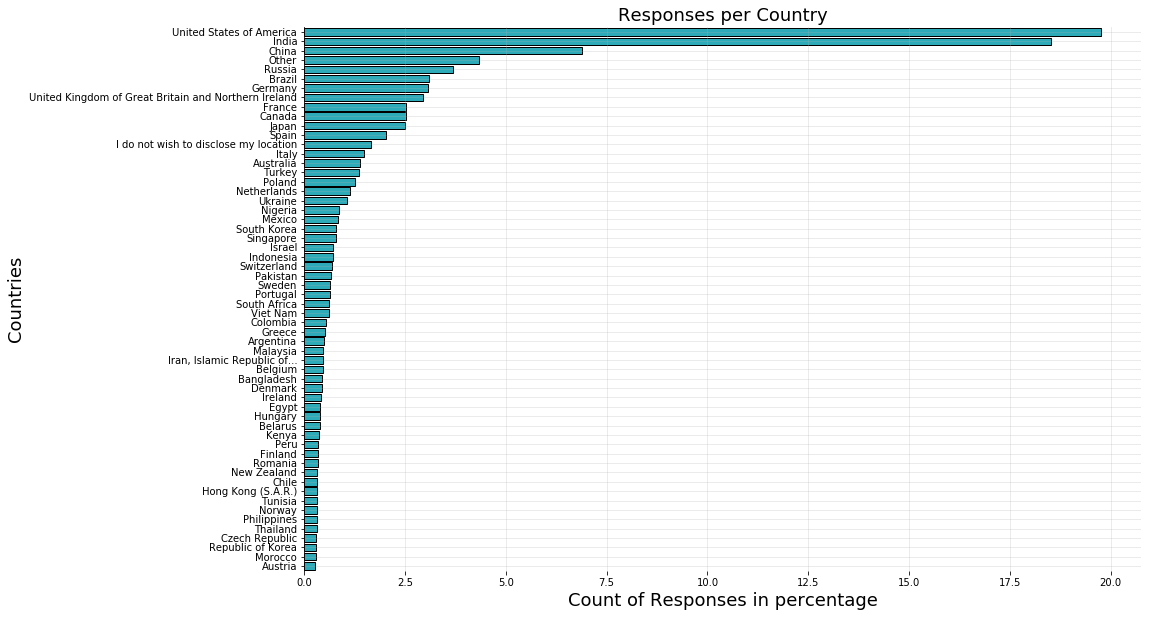

In [181]:
responses_country = responses_df['Q3'].value_counts()
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=responses_country.index.values , x=responses_country * 100 /responses_df.shape[0] , color='#17becf', edgecolor='black')
ax.set_xlabel("Count of Responses in percentage", fontsize=18)
ax.set_title('Responses per Country', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
sns.despine(bottom=True)
plt.grid(True, alpha=0.3)

Almost 39% responses are only from `USA` and `India`.

In [182]:
data = dict(
        type = 'choropleth',
        locations = responses_country.index,
        locationmode = 'country names',
        z = responses_country.values,
        text = responses_country.index,
         colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = {'title' : 'No. of Responses',
                    'len': 0.8,
                    'x': 1,
                    'y': 0.6},
            
      ) 

layout = go.Layout(
    title = 'Country wise Number of Responses',
    height = 500,
    width = 800,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection={'type':'natural earth'},
        showcountries= True,
        countrywidth = 1
    ),
    autosize = False,
    margin= {
            'l': 20,
            'r': 20,
            'b': 40,
            't': 40,
            'pad': 20
        }
)

fig = go.Figure( data=[data], layout=layout )
#iplot( fig, validate=False, filename='d3-world-map' )
iplot( fig, validate=False)

** Let's find out the Age Distribution of respondents**

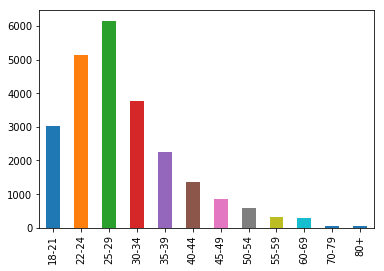

In [183]:
responses_df['Q2'].value_counts().sort_index().plot('bar')

<H3>3. Data Preparation </H3>

****`Question 1:`**** can be answered from variables `Q35_Part_1` to `Q35_Part_6`

****`Question 2:`**** can be answered from variables `Q39_Part_1` to `Q39_Part_2`

****`Question 3:`**** can be answered from variables `Q18` and `Q26`. Here `Q18` will provide the recommended programming language and `Q26` will filter the respondents who consider themselves to be Data Scientists.

****`Question 4:`**** can be answered from variables `Q36_Part_1` to `Q36_Part_13`

****`Question 5:`**** can be answered from variables `Q38_Part_1` to `Q38_Part_22`

**** Following are some helper functions: ****

In [184]:
def get_data_few_rows(column_name):
    print("This is how data looks in {} \n".format(column_name))
    print(responses_df[column_name][:10])

def print_null_values(column_name):
    print("Total null values in {} are {}".format(column_name,responses_df[column_name].isnull().sum()))
    
def plot_countplot(variable, ax):
    ax = sns.countplot(variable,ax=ax)    
    for item in ax.get_xticklabels():
        item.set_rotation(30)
    sns.despine(bottom=True)
    return ax

def plot_barplot_h(variable):    
    ax = variable.plot('barh', figsize=(10,5), color='#17becf', edgecolor='black')
    sns.despine(bottom=True, left=True)
    return ax

**** Data Preparation for Question 1 ****

This is divided into two parts: 

a) Check which category received responses with learning greater than 0.

b) Percentage distribution of each category

In [185]:
# How the data looks like for Q35

get_data_few_rows('Q35_Part_1')

print("------------------------------------------------------------------")

# Find out the null values in each of these variables
print_null_values('Q35_Part_1')
print_null_values('Q35_Part_2')
print_null_values('Q35_Part_3')
print_null_values('Q35_Part_4')
print_null_values('Q35_Part_5')
print_null_values('Q35_Part_6')

This is how data looks in Q35_Part_1 

1     NaN
2     NaN
3       0
4      40
5      20
6      40
7      50
8      75
9     NaN
10     70
Name: Q35_Part_1, dtype: object
------------------------------------------------------------------
Total null values in Q35_Part_1 are 8114
Total null values in Q35_Part_2 are 8114
Total null values in Q35_Part_3 are 8114
Total null values in Q35_Part_4 are 8114
Total null values in Q35_Part_5 are 8114
Total null values in Q35_Part_6 are 8114


****`Part a:`**** 
As these responses are in `numbers` but the variable is of type `object` so
1. Will convert the variable type to float 
2. take only those values which are greater than 0 so that `Null` values will be handled.

In [186]:
# Clean the data and create a dictionary
learning_category_dict = {
    'Self-taught' : (responses_df['Q35_Part_1'].astype(float) >0).sum(),
    'Online courses (Coursera, Udemy, edX, etc.)' :(responses_df['Q35_Part_2'].astype(float) >0).sum(),
    'Work':(responses_df['Q35_Part_3'].astype(float) >0).sum(),
    'University': (responses_df['Q35_Part_4'].astype(float) >0).sum(),
    'Kaggle competitions': (responses_df['Q35_Part_5'].astype(float) >0).sum(),
    'Other': (responses_df['Q35_Part_6'].astype(float) >0).sum()
}

# Convert the dictionary into a Series
learning_category = pd.Series(learning_category_dict)

****`Part b:` **** 

To answer this we do not need to convert the variables into float so directly taking their values

In [187]:
# Clean the data and create a dictionary
responses_df['Q35_Part_5'].loc[responses_df['Q35_Part_5'].astype(float)<0] = 0   
learning_distribution_dict = {
    'Self-taught' : responses_df['Q35_Part_1'].values,
    'Online courses (Coursera, Udemy etc)' : responses_df['Q35_Part_2'].values,
    'Work': responses_df['Q35_Part_3'].values,
    'University': responses_df['Q35_Part_4'].values,
    'Kaggle competitions': responses_df['Q35_Part_5'].values,
    'Other': responses_df['Q35_Part_6'].values
}
# prepare the data to analyze
learning_distribution_df = pd.DataFrame(learning_distribution_dict)

<H4>Data Preparation for Question 2</H4>

In [188]:
# How the data looks like for Q39
get_data_few_rows('Q39_Part_1')

This is how data looks in Q39_Part_1 

1                   Much better
2                Slightly worse
3                Slightly worse
4                    Much worse
5               Slightly better
6     No opinion; I do not know
7               Slightly better
8               Slightly better
9                   Much better
10               Slightly worse
Name: Q39_Part_1, dtype: object


Both of these variables are categorical and there are 6 categories so they need to be put in some particular order.

In [189]:
# This question responses are having ordered category data should be in order  
sorter = ['Much better','Slightly better', 'Neither better nor worse', 'Slightly worse','Much worse', 'No opinion; I do not know']

# Set the categorcal variables in a particular order for Q39_Part_1
responses_df['Q39_Part_1'] = responses_df['Q39_Part_1'].astype('category')
OnlineMOOC_df = responses_df['Q39_Part_1'].cat.set_categories(sorter)

# Set the categorcal variables in a particular order for Q39_Part_2
responses_df['Q39_Part_2'] = responses_df['Q39_Part_2'].astype('category')
Bootcamps_df = responses_df['Q39_Part_2'].cat.set_categories(sorter)

<H4>Data Preparation for Question 3 </H4>

We need to check the responses from Q18 to get the languages but we also need to check if they are referred by Data Scientists and this detail we will get from Q26.

In [190]:
# How the data looks like for Q39
get_data_few_rows('Q18')

print("----------------------------------------------------------------\n")
get_data_few_rows('Q26')
print("----------------------------------------------------------------\n")
print("Following are the unique values from Q26\n")
print(responses_df['Q26'].unique())

This is how data looks in Q18 

1     Python
2     Python
3     Python
4        SQL
5          R
6     Python
7          R
8     Python
9      Other
10    Python
Name: Q18, dtype: object
----------------------------------------------------------------

This is how data looks in Q26 

1              Maybe
2     Definitely not
3     Definitely yes
4       Probably yes
5              Maybe
6              Maybe
7       Probably not
8       Probably not
9     Definitely not
10      Probably not
Name: Q26, dtype: object
----------------------------------------------------------------

Following are the unique values from Q26

['Maybe' 'Definitely not' 'Definitely yes' 'Probably yes' 'Probably not'
 nan]


As we only want to see the languages referred by respondents who consider themselves to be Data Scientists so we will be filtering the data based on `Maybe`, `Definitely yes` and `Probably yes`.

In [191]:
languages_referred = responses_df['Q18'][(responses_df['Q18'].notnull()) 
                                         & ((responses_df['Q26'] == 'Probably yes') 
                                            | (responses_df['Q26'] == 'Definitely yes') 
                                            | (responses_df['Q26'] == 'Maybe'))]

<H4>Data Preparation for Question 4 </H4>

In [192]:
# How the data looks like for Q36
get_data_few_rows('Q36_Part_1')
get_data_few_rows('Q36_Part_2')

print("------------------------------------------------------------------")

# Find out the null values in each of these variables
print_null_values('Q36_Part_1')
print_null_values('Q36_Part_2')
print_null_values('Q36_Part_3')
print_null_values('Q36_Part_4')
print_null_values('Q36_Part_5')
print_null_values('Q36_Part_6')
print_null_values('Q36_Part_7')
print_null_values('Q36_Part_8')
print_null_values('Q36_Part_9')
print_null_values('Q36_Part_10')
print_null_values('Q36_Part_11')
print_null_values('Q36_Part_12')
print_null_values('Q36_Part_13')

This is how data looks in Q36_Part_1 

1         NaN
2         NaN
3         NaN
4         NaN
5     Udacity
6         NaN
7         NaN
8     Udacity
9         NaN
10    Udacity
Name: Q36_Part_1, dtype: object
This is how data looks in Q36_Part_2 

1          NaN
2          NaN
3          NaN
4     Coursera
5     Coursera
6     Coursera
7          NaN
8          NaN
9          NaN
10         NaN
Name: Q36_Part_2, dtype: object
------------------------------------------------------------------
Total null values in Q36_Part_1 are 20183
Total null values in Q36_Part_2 are 14833
Total null values in Q36_Part_3 are 20196
Total null values in Q36_Part_4 are 19614
Total null values in Q36_Part_5 are 23151
Total null values in Q36_Part_6 are 19857
Total null values in Q36_Part_7 are 22289
Total null values in Q36_Part_8 are 22819
Total null values in Q36_Part_9 are 19529
Total null values in Q36_Part_10 are 23580
Total null values in Q36_Part_11 are 21907
Total null values in Q36_Part_12 are 

There are too many `Null` values so it is better to exclude them from the analysis

In [193]:
online_learning_dict = { 
    'Udacity' :                responses_df['Q36_Part_1'].notnull().sum(),
    'Coursera' :               responses_df['Q36_Part_2'].notnull().sum(),
    'edX' :                    responses_df['Q36_Part_3'].notnull().sum(),
    'DataCamp':                responses_df['Q36_Part_4'].notnull().sum(),
    'DataQuest':               responses_df['Q36_Part_5'].notnull().sum(),
    'Kaggle Learn':            responses_df['Q36_Part_6'].notnull().sum(),
    'Fast.AI':                 responses_df['Q36_Part_7'].notnull().sum(),
    'developers.google.com':   responses_df['Q36_Part_8'].notnull().sum(),
    'Udemy':                   responses_df['Q36_Part_9'].notnull().sum(),
    'TheSchool.AI':            responses_df['Q36_Part_10'].notnull().sum(),
    'Online University Courses':responses_df['Q36_Part_11'].notnull().sum(),
    'None':                    responses_df['Q36_Part_12'].notnull().sum(),
    'Other':                   responses_df['Q36_Part_13'].notnull().sum(),
}

online_learning = pd.Series(online_learning_dict).sort_values(ascending=False)

<H4>Data Preparation for Question 5 </H4>

In [194]:
# How the data looks like for Q38
get_data_few_rows('Q38_Part_1')
get_data_few_rows('Q38_Part_3')

print("------------------------------------------------------------------")

# Find out the null values in each of these variables
print_null_values('Q38_Part_1')
print_null_values('Q38_Part_2')
print_null_values('Q38_Part_3')
print_null_values('Q38_Part_4')
print_null_values('Q38_Part_5')
print_null_values('Q38_Part_6')
print_null_values('Q38_Part_7')
print_null_values('Q38_Part_8')
print_null_values('Q38_Part_9')
print_null_values('Q38_Part_10')
print_null_values('Q38_Part_11')
print_null_values('Q38_Part_12')
print_null_values('Q38_Part_13')
print_null_values('Q38_Part_14')
print_null_values('Q38_Part_15')
print_null_values('Q38_Part_16')
print_null_values('Q38_Part_17')
print_null_values('Q38_Part_18')
print_null_values('Q38_Part_19')
print_null_values('Q38_Part_20')
print_null_values('Q38_Part_21')
print_null_values('Q38_Part_22')

This is how data looks in Q38_Part_1 

1     Twitter
2         NaN
3     Twitter
4         NaN
5         NaN
6         NaN
7         NaN
8     Twitter
9         NaN
10        NaN
Name: Q38_Part_1, dtype: object
This is how data looks in Q38_Part_3 

1                   NaN
2                   NaN
3                   NaN
4                   NaN
5                   NaN
6     r/machinelearning
7                   NaN
8     r/machinelearning
9                   NaN
10                  NaN
Name: Q38_Part_3, dtype: object
------------------------------------------------------------------
Total null values in Q38_Part_1 are 20721
Total null values in Q38_Part_2 are 21847
Total null values in Q38_Part_3 are 20800
Total null values in Q38_Part_4 are 18296
Total null values in Q38_Part_5 are 23096
Total null values in Q38_Part_6 are 21835
Total null values in Q38_Part_7 are 23637
Total null values in Q38_Part_8 are 23317
Total null values in Q38_Part_9 are 23255
Total null values in Q38_Part_10 

Too many `Null` values and most of the variables have more than 80-90 percent NULL values

In [195]:
media_sources_dict = { 
    'Twitter' :                            responses_df['Q38_Part_1'].notnull().sum(),
    'Hacker News' :                        responses_df['Q38_Part_2'].notnull().sum(),
    'r/machinelearning' :                  responses_df['Q38_Part_3'].notnull().sum(),
    'Kaggle forums':                       responses_df['Q38_Part_4'].notnull().sum(),
    'Fastai forums':                       responses_df['Q38_Part_5'].notnull().sum(),
    'Siraj Raval YouTube Channel':         responses_df['Q38_Part_6'].notnull().sum(),
    'DataTau News Aggregator':             responses_df['Q38_Part_7'].notnull().sum(),
    'Linear Digressions Podcast':          responses_df['Q38_Part_8'].notnull().sum(),
    'Cloud AI Adventures (YouTube)':       responses_df['Q38_Part_9'].notnull().sum(),
    'FiveThirtyEight.com':                 responses_df['Q38_Part_10'].notnull().sum(),
    'ArXiv & Preprints':                   responses_df['Q38_Part_11'].notnull().sum(),
    'Journal Publications':                responses_df['Q38_Part_12'].notnull().sum(),
    'FastML Blog':                         responses_df['Q38_Part_13'].notnull().sum(),
    'KDnuggets Blog':                      responses_df['Q38_Part_14'].notnull().sum(),
    'O''Reilly Data Newsletter':           responses_df['Q38_Part_15'].notnull().sum(),
    'Partially Derivative Podcast':        responses_df['Q38_Part_16'].notnull().sum(),
    'The Data Skeptic Podcast':            responses_df['Q38_Part_17'].notnull().sum(),
    'Medium Blog Posts':                   responses_df['Q38_Part_18'].notnull().sum(),
    'Towards Data Science Blog':           responses_df['Q38_Part_19'].notnull().sum(),
    'Analytics Vidhya Blog':               responses_df['Q38_Part_20'].notnull().sum(),
    'None/I do not know':                  responses_df['Q38_Part_21'].notnull().sum(),
    'Other':                               responses_df['Q38_Part_22'].notnull().sum()
       
}

media_sources = pd.Series(media_sources_dict).sort_values(ascending=False)

<H3>3. Data Analysis and Visualization </H3>

<H4>Data Analysis and Visualization for Question 1 </H4>

This is divided into two parts:

a) Check which category received responses with learning greater than 0.

b) Percentage distribution of each category

****`Part 1:`**** we will use the learning category variable created in Data preparation stage

In [196]:
print("Following are the Responses received for each category where learning is greater than 0\n")
print(learning_category)

Following are the Responses received for each category where learning is greater than 0

Self-taught                                    12562
Online courses (Coursera, Udemy, edX, etc.)    11228
Work                                            8434
University                                      7851
Kaggle competitions                             7144
Other                                           1094
dtype: int64


Text(0.5,1,'Number of respondents for each learning category')

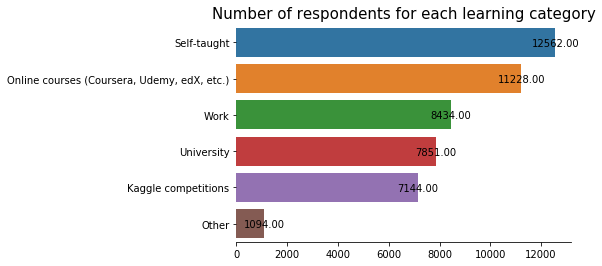

In [197]:
ax = sns.barplot(y = learning_category.index.values, x=learning_category)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 2.5, p.get_y()+p.get_height()/2. + 0.1, '{:1.2f}'.format(width),ha="center")
sns.despine(top=True, left=True)
ax.set_title("Number of respondents for each learning category", fontsize=15)

Most number of respondents say that they have given some part of their learning into `Self-taught` category. It is then followed by Online Courses such as Udacity, Coursera etc.

Difference in number of responses received in each of these three categories - `Work`, `University` and `Kaggle Compititions` is not much.

****`Part 2:`**** we will use the learning distribution dataframe created in Data preparation stage

In [198]:
learning_distribution_df.head()

,Self-taught,"Online courses (Coursera, Udemy etc)",Work,University,Kaggle competitions,Other
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,100,0,0
3,40,40,10,0,10,0
4,20,40,20,20,0,0


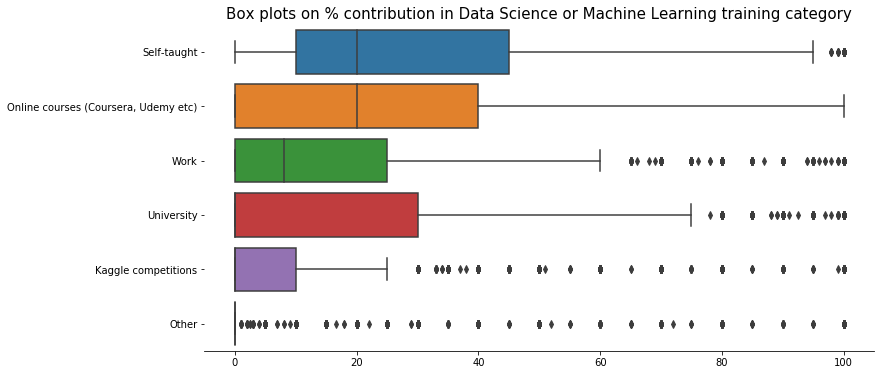

In [199]:
#plot the boxplot of the data
fig, ax = plt.subplots(figsize= (12,6))
ax = sns.boxplot(data=learning_distribution_df, orient='h')
ax.set_title('Box plots on % contribution in Data Science or Machine Learning training category', fontsize=15)
sns.despine(top=True, left=True, right=True)

No category is clearly the winner but `self-taught` and `Online Courses` are ahead in %age of learning 

<H4>Data Analysis and Visualization for Question 2 </H4>

We will use the `OnlineMOOC_df` and `Bootcamps_df` created in Data preparation stage.

Both of these variables have categorical ordered data

In [230]:
print("Following are the categories in Online MOOCs\n")
print(OnlineMOOC_df.unique())
print("\nFollowing is the Number of responses in each category\n")
print(OnlineMOOC_df.value_counts())
print("\n-------------------------------------------------------\n")
print("Following are the categories in In-person Bootcams\n")
print(Bootcamps_df.unique())
print("\nFollowing is the Number of responses in each category\n")
print(Bootcamps_df.value_counts())

Following are the categories in Online MOOCs

[Much better, Slightly worse, Much worse, Slightly better, No opinion; I do not know, Neither better nor worse, NaN]
Categories (6, object): [Much better, Slightly worse, Much worse, Slightly better, No opinion; I do not know, Neither better nor worse]

Following is the Number of responses in each category

Slightly better              4554
Much better                  3908
Neither better nor worse     3647
Slightly worse               1749
No opinion; I do not know    1564
Much worse                    557
Name: Q39_Part_1, dtype: int64

-------------------------------------------------------

Following are the categories in In-person Bootcams

[Much worse, No opinion; I do not know, Slightly better, Much better, Neither better nor worse, Slightly worse, NaN]
Categories (6, object): [Much worse, No opinion; I do not know, Slightly better, Much better, Neither better nor worse, Slightly worse]

Following is the Number of responses in each c

Text(0.5,0,'Opinion')

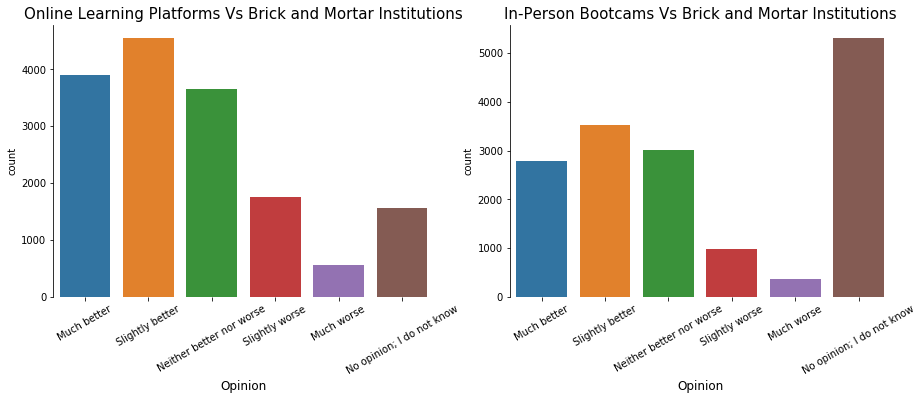

In [231]:
fig, axr = plt.subplots(1,2, figsize=(15,5))

ax1 = plot_countplot(OnlineMOOC_df, axr[0])
ax1.set_title('Online Learning Platforms Vs Brick and Mortar Institutions', fontsize=15)
ax1.set_xlabel('Opinion', fontsize=12)

ax2 = plot_countplot(Bootcamps_df, axr[1])
ax2.set_title('In-Person Bootcams Vs Brick and Mortar Institutions', fontsize=15)
ax2.set_xlabel('Opinion', fontsize=12)

****`Online MOOCs`**** : Number of Respondents who have opinion that Online MOOCs are Better, they are almost 4 times the Number of Respondents who say these are Worse.

****`In-Person Bootcamps`**** : Number of Respondents who have opinion that Bootcamps are Better, they are almost 4 times the Number of Respondents who say these are Worse.

There are some respondents who choose to opt-out as they do not have any opinion. However, Bootcamps have most number of respondents who do not have any opinion or they don't know.

<H4>Data Analysis and Visualization for Question 3 </H4>

We will use the languages_referred variable created in Data preparation stage.

In [236]:
print("This is how the data looks like\n")
print(languages_referred[:5])

print("\n-----------------------------------------------------\n")

print("Following is the count of each Language referred by Data Scientists\n")
print(languages_referred.value_counts())

This is how the data looks like

1    Python
3    Python
4       SQL
5         R
6    Python
Name: Q18, dtype: object

-----------------------------------------------------

Following is the count of each Language referred by Data Scientists

Python        10378
R              1814
SQL             646
C++             248
MATLAB          177
Java            128
Other           103
Scala            54
SAS              53
Javascript       52
None             51
VBA              32
Go               13
Name: Q18, dtype: int64


Text(0,0.5,'Percent')

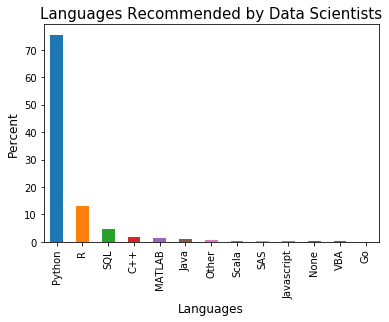

In [203]:
ax = (languages_referred.value_counts() * 100 / len(languages_referred)).plot('bar')
ax.set_title("Languages Recommended by Data Scientists", fontsize =15)
ax.set_xlabel("Languages", fontsize=12)
ax.set_ylabel("Percent", fontsize=12)

Clearly, `Python` wins the race by a huge margin as most referred langauge to start with. It is then followed by R and SQL. Other langauges such as C++, MATLAB, Java, Scala etc might be referred as respondent is working on these.

<H4>Data Analysis and Visualization for Question 4 </H4>

We will use the online_learning variable created in Data preparation stage.

In [238]:
print("Following is the count of responses received against each Online learning Platforms\n")
print(online_learning)

Following is the count of responses received against each Online learning Platforms

Coursera                     9026
Udemy                        4330
DataCamp                     4245
Kaggle Learn                 4002
Udacity                      3676
edX                          3663
None                         1976
Online University Courses    1952
Fast.AI                      1570
Other                        1244
developers.google.com        1040
DataQuest                     708
TheSchool.AI                  279
dtype: int64


Text(0.5,0,'Number of responses')

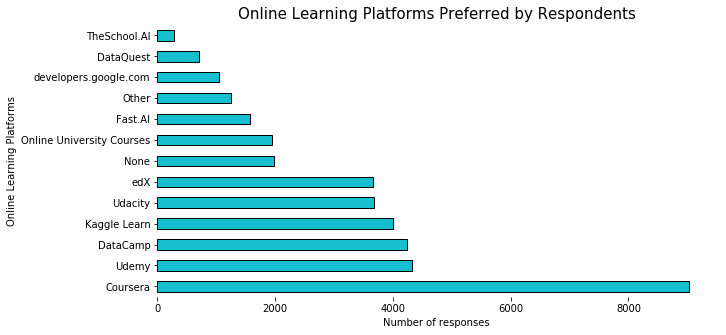

In [205]:
ax = plot_barplot_h(online_learning)
ax.set_title('Online Learning Platforms Preferred by Respondents', fontsize=15)
ax.set_ylabel('Online Learning Platforms')
ax.set_xlabel('Number of responses')

`Coursera` received the most number of responses. It is then followed by Udemy, Datacamp, Kaggle learn, Udacity and edX. 

<H4>Data Analysis and Visualization for Question 5 </H4>

We will use the media sources variable created in Data preparation stage

In [240]:
print("Following are the number of responses received against each media source\n")
print(media_sources)

Following are the number of responses received against each media source

Kaggle forums                    5563
Medium Blog Posts                5011
ArXiv & Preprints                3142
Twitter                          3138
None/I do not know               3104
r/machinelearning                3059
KDnuggets Blog                   3050
Journal Publications             2149
Siraj Raval YouTube Channel      2024
Hacker News                      2012
Other                            1560
FiveThirtyEight.com              1543
OReilly Data Newsletter          1538
Fastai forums                     763
FastML Blog                       683
The Data Skeptic Podcast          671
Cloud AI Adventures (YouTube)     604
Linear Digressions Podcast        542
Partially Derivative Podcast      316
DataTau News Aggregator           222
Analytics Vidhya Blog               0
Towards Data Science Blog           0
dtype: int64


Text(0.5,0,'Number of responses')

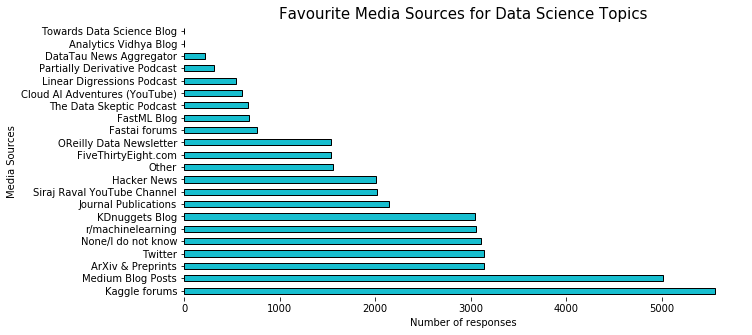

In [207]:
ax = plot_barplot_h(media_sources)
ax.set_title('Favourite Media Sources for Data Science Topics', fontsize=15)
ax.set_ylabel('Media Sources')
ax.set_xlabel('Number of responses')

It is of no surprise that `Kaggle forums` received the maximum number of responses because survey was done by Kaggle. It is then followed by `Medium blog posts`. It was surprise to me that `Analytics Vidhya` and `Towards Data Science` blogs did not receive any votes. 


<H3>5. Conclusions </H3>

It can be concluded that Self-Learning is anyway necessary whether you opt for Online Courses or Work. 

As per responses, Online Learning Courses quality is better than the Brick and Mortar Institutions so you can feel safe and choose Online Courses.

Python is the most recommended programming language followed by R. As per my experience, it is better to have SQL knowledge also.

Coursera is the most popular Online Learning Platform for Data Science and Machine Learning. But as per my experience, you should choose between Coursera and Udacity.

Apart from Kaggle Forums, Medium Blogs and ArXiv & Preprints is also adviced. 